In [1]:
print('oi')

oi


In [2]:
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import wfdb
from wfdb import processing

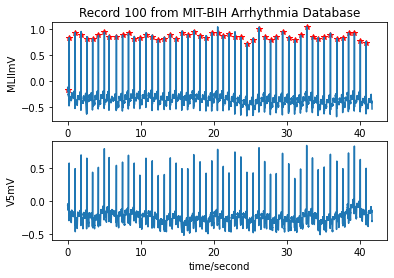

In [3]:
# Demo 5 - Read a WFDB record and annotation. Plot all channels, and the annotation on top of channel 0.
record = wfdb.rdrecord('100', sampto = 15000, pn_dir='mitdb')
annotation = wfdb.rdann('100', 'atr', sampto = 15000, pn_dir='mitdb')

wfdb.plot_wfdb(record=record, annotation=annotation,
               title='Record 100 from MIT-BIH Arrhythmia Database',
               time_units='seconds')

In [4]:
peak_inds = processing.qrs.gqrs_detect(sig=record.p_signal[:,0], fs=record.fs)
bpm = processing.hr.compute_hr(sig_len=record.p_signal.shape[0], qrs_inds=peak_inds, fs=record.fs)

In [5]:
a = 0 # Variável auxiliar para evitar adicionar batimentos repetidos.
lista_bpm = []
for v in bpm:
    if np.isnan(v) == False:        #retira os 'nan'
        if v != a:                  #Só adiciona valores corretos
            #print(int(v))
            lista_bpm.append(int(v))
        a = v

lista_bpm

[73,
 76,
 75,
 76,
 73,
 91,
 60,
 71,
 73,
 75,
 77,
 71,
 70,
 73,
 72,
 72,
 75,
 75,
 75,
 72,
 69,
 72,
 76,
 75,
 77,
 76,
 73,
 72,
 71,
 74,
 77,
 75,
 76,
 69,
 71,
 72,
 74,
 72,
 75,
 76,
 73,
 70,
 68,
 72,
 77,
 74,
 73]